# Multilayer Perceptron (MLP) - Estudo Experimental

## Objetivos
- Definir número de camadas (input, hidden, output)
- Definir número de neurônios por camada
- Inicialização dos pesos
- Funções de ativação (ReLU, Sigmoid, Tanh)

# 1. Arquitetura de MLP

## O que é uma MLP?
Uma Multilayer Perceptron é uma rede neural feed-forward que consiste em várias camadas de neurônios:

- **Camada de entrada**: Recebe os dados (784 neurônios para Fashion MNIST - 28x28 pixels)
- **Camadas ocultas**: Realizam transformações não-lineares dos dados
- **Camada de saída**: Produz a classificação final (10 neurônios para as 10 classes)

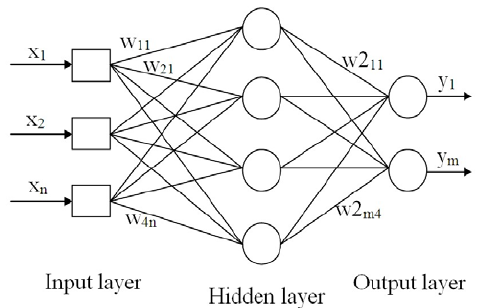

## Importância do número de camadas
- Maior número de camadas = representação hierárquica mais complexa
- Desafios: vanishing/exploding gradients, overfitting
- Trade-off entre capacidade de representação e facilidade de treinamento

# 2. Número de Neurônios por Camada

## Dimensionamento de Camadas
- **Camada de entrada**: Definida pelo tamanho dos dados (784 para Fashion MNIST)
- **Camadas ocultas**: Escolha crítica que afeta o poder de representação
- **Camada de saída**: Definida pelo número de classes (10 para Fashion MNIST)

Existem algumas "regrinhas” para estimar quantos neurônios usar nas camadas ocultas, por exemplo:

1. O número de neurônios ocultos deve ficar entre o tamanho da camada de entrada e o tamanho da camada de saída.

2. O número de neurônios ocultos deve ser ⅔ do tamanho da camada de entrada, mais o tamanho da camada de saída.

3. O número de neurônios ocultos deve ser menor que o dobro do tamanho da camada de entrada.

Fonte: https://www.youtube.com/watch?app=desktop&v=bqBRET7tbiQ

## Arquiteturas testadas neste projeto
- `[256]`
- `[512]`
- `[512, 256]`
- `[256, 128]`

# 3. Inicialização de Pesos

## Por que a inicialização de pesos é importante?
- Inicialização adequada ajuda a convergência mais rápida
- Pode prevenir o problema de vanishing/exploding gradients
- Impacto significativo no desempenho final do modelo

## Métodos de inicialização implementados

### 1. Random
ou Inicialização Aleatória Simples ()
- Pesos inicializados como valores pequenos e aleatórios
- `W = np.random.randn(fan_in, fan_out) * 0.01`
- Limitações: não considera a arquitetura da rede

### 2. Xavier
ou Inicialização de Glorot
- Desenvolvida para ativações sigmoidais e tanh
- `W = np.random.randn(fan_in, fan_out) * sqrt(1/fan_in)`
- Mantém a variância constante através das camadas

### 3. He 
Inicialização por He et al.
- Otimizada para funções ReLU
- `W = np.random.randn(fan_in, fan_out) * sqrt(2/fan_in)`
- Ajuda a propagar o gradiente em redes profundas com ReLU

# 4. Funções de Ativação

## O papel das funções de ativação
- Introduzem não-linearidade na rede
- Cada tipo tem características específicas que afetam o treinamento

## Funções implementadas

### 1. Sigmoid
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Saída no intervalo (0,1)

### 2. Tanh
- $tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- Saída no intervalo (-1,1)

### 3. ReLU (Rectified Linear Unit)
- $ReLU(x) = max(0, x)$

# 5. Experimentos Realizados

## Configuração experimental
- **Dataset**: Fashion MNIST (60k treino, 10k teste)
- **Treinamento**: 30 épocas, batch size de 256
- **Otimizador**: SGD com momentum 0.9
- **Taxa de aprendizado**: 0.01

## Grade de hiperparâmetros testados
- **Arquiteturas**: `[256]`, `[512]`, `[512, 256]` e `[256, 128]`
- **Ativações**: ReLU, Sigmoid, Tanh
- **Inicializações**: He, Xavier, Random

Total: 36 combinações de hiperparâmetros

# 6. Resultados

## Melhores configurações

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hidden</th>
      <th>activation</th>
      <th>init</th>
      <th>acc</th>
      <th>loss</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27</th>
      <td>[256, 128]</td>
      <td>relu</td>
      <td>he</td>
      <td>85.283333</td>
      <td>0.414403</td>
    </tr>
    <tr>
      <th>9</th>
      <td>[512]</td>
      <td>relu</td>
      <td>he</td>
      <td>85.033333</td>
      <td>0.420789</td>
    </tr>
    <tr>
      <th>10</th>
      <td>[512]</td>
      <td>relu</td>
      <td>xavier</td>
      <td>84.866667</td>
      <td>0.431639</td>
    </tr>
    <tr>
      <th>28</th>
      <td>[256, 128]</td>
      <td>relu</td>
      <td>xavier</td>
      <td>84.800000</td>
      <td>0.424113</td>
    </tr>
    <tr>
      <th>30</th>
      <td>[256, 128]</td>
      <td>tanh</td>
      <td>he</td>
      <td>84.633333</td>
      <td>0.427227</td>
    </tr>
  </tbody>
</table>
</div>

## Melhor modelo: Análise detalhada
- **Arquitetura**: [256, 128]
- **Ativação**: ReLU
- **Inicialização**: He
- **Acurácia no teste**: 85.23%

## Matriz de confusão

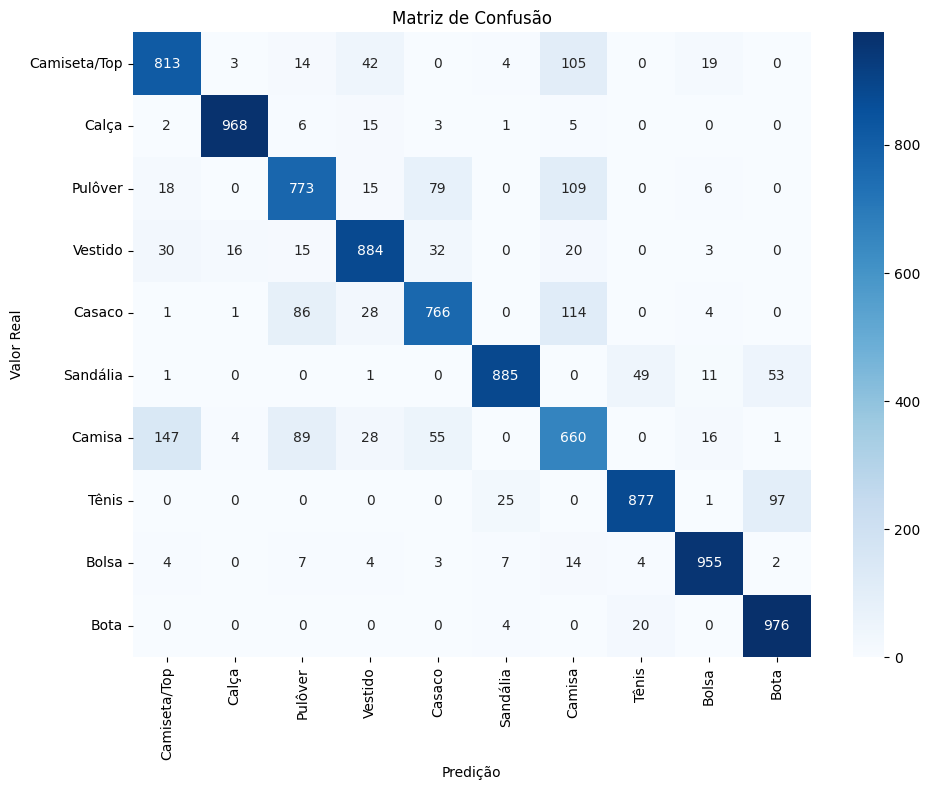

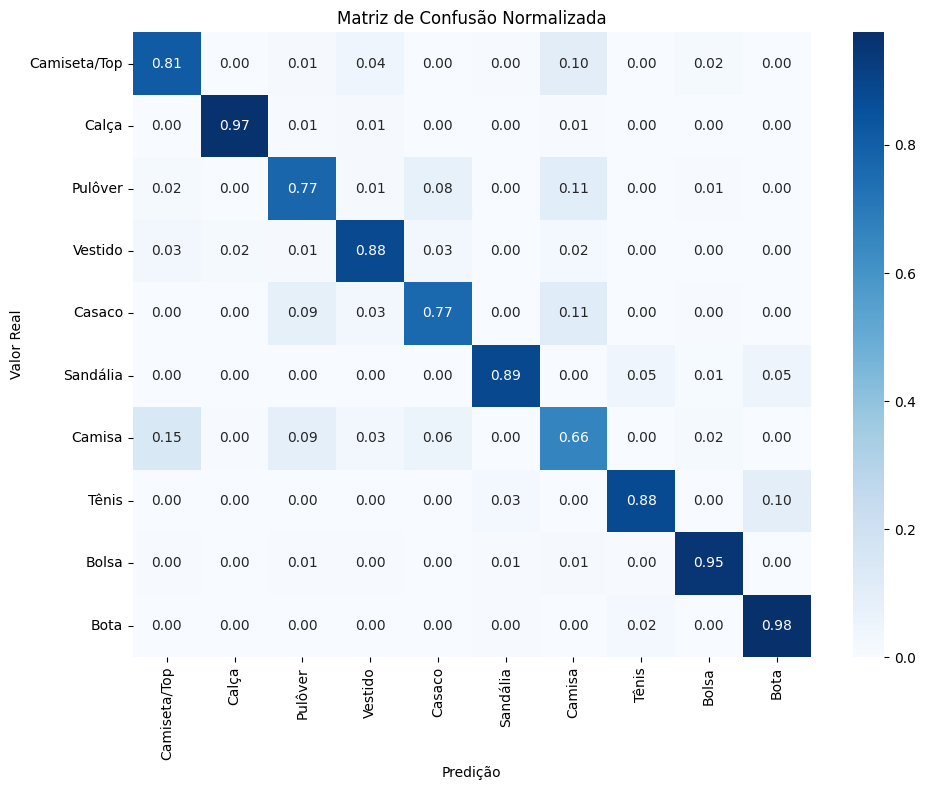

### Erro comum:
Confusão entre Camisa e Camiseta/Top

# 7. Análise Comparativa _Neste Experimento_

## Impacto do número de camadas e neurônios
- [256, 128] e [512] tiveram melhor desempenho

## Impacto das funções de ativação
- ReLU > Tanh > Sigmoid em termos de desempenho

## Impacto da inicialização de pesos
- He > Xavier > Random para inicialização